<span style="color:blue">
    
# **_Predicting loan default risk_**</span>

<span style="color:blue">
    
### **_Context_**</span>

The Home Credit Group is an organisation that specialises in providing loans to people that have low exposure to banking services. 

<span style="color:blue">

**_Overall objective_**:</span> To predict loans at risk of becoming past due or defaulting using data on loan recipients from the Home Credit Group (source provided below)

<span style="color:blue">
    
**_Objectives for Notebook 01_**:</span>
   * Clean data
   * Study definitions for each dataset and explore features (EDA)
   * Identify main dataset to analyse first
   * Create features to predict loan defaulting/late payments
   * Identify features that are distributed with greater variance with respect to target for modelling
   * Define groups of features from main dataset to model and compare in Notebook 02 
   * Split dataset; prepare and package training, validation and testing datasets 
   

| Basic assumptions and caveats | Context | 
| :--- | :--- |
| * Loans that are past due are at higher risk of defaulting, and potential clients are interested in reducing the risk of loan defaults  | The target variable in the main dataset (application_train) indicates loans that are "past due" or in default. The definition of the target variable includes defaults, "late payments over X days on at least one of the first Y installments of the loan in our sample", as well as "client with payment difficulties"| The target variable is provided in the dataset and uses this broader definition |
| For simplicity, we will use the term "loan default," while understanding the actual broader meaning.  |  |

<span style="color:blue">

**_Data source_**: </span> [The home credit default risk Kaggle competition](https://www.kaggle.com/c/home-credit-default-risk/). Data were downloaded from [here](https://storage.googleapis.com/341-home-credit-default/home-credit-default-risk.zip). The database consist of seven (7) datasets shown below: _application_train.csv_, _bureau.csv_, _bureau_balance.csv_, _POS_CASH_balance.csv_, _credit_card_balance.csv_, _previous_application.csv_, and _installments_payments.csv_.

<span style="color:blue">

### **_0.0 Prepare univariate statistics for each table via DataPrep automatic report generator_**</span>


In [1]:
from utils.libraries01 import *

from utils.functions import (
    find_duplicates,
    rename_columns,
    take_sample,
    process_dataset_eda,
    split_val_test,
    create_feature_ratios,
    correlation_bar,
    downsize_dtypes,
    plot_lineplots,
)

# Format settings
# %load_ext jupyter_black
%reload_ext jupyter_black
pd.options.display.float_format = "{:,.2f}".format

End of utils module


Figure 1. Entity Relationship diagramme


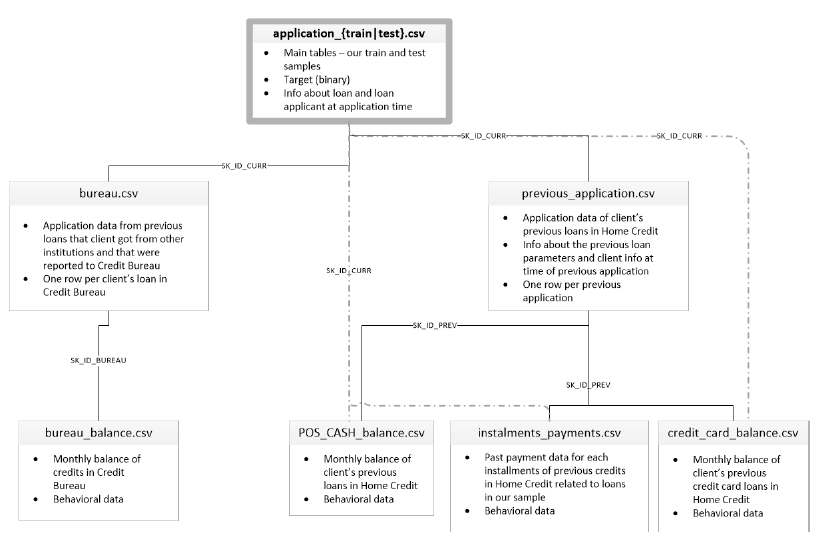

In [2]:
print("Figure 1. Entity Relationship diagramme")
Image("viz/ER diagramme.png")

<span style="color:blue">

#### **_Insights:_**</span>
* The main dataset or table is application_train, which contains the target variable, which refers to whether a loan application was approved or rejected
* The four tables on the right refer to applicant data on previous applications and loans with the Home Credit Group
* The two tables on the left refer data on the same applicants with respect to their loans with other financial institutions
* There are two main types of loans: cash loans or point of sales loans (_POS_CASH_balance_) and revolving loans (_credit_card_balance_).
* _installments_payments.csv_ contains data on both types of loans
* Plan: fit a model using features from main table, and then work to improve prediction using features from other tables

<span style="color:blue">

#### **_Note:_**</span>

* DataPrep uses Dask to prepare reports with univariate and bivariate statistics and visualisations

<span style="color:blue">

### **_1.1 Application data: check for duplicates and missing values_** </span>

<span style="color:blue">
    
#### **_1.1.1 Duplicates_**

In [3]:
dups = find_duplicates("data/application_train.csv", chunksize=10000, index_col=[0])
dups

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG, APARTMENTS_MODE, BASEMENTAREA_MODE, YEARS_BEGINEXPLUATATION_MODE, YEARS_BUILD_MODE, COMMONAREA_MODE, ELEVATORS_MODE, ENTRANCES_MODE, FLOORSMAX_MODE, FLOORSMIN_MODE, LANDAREA_MODE, LIVINGAPARTMENTS_MODE, LIVINGAREA_MODE, NONLIVINGAPARTMENTS_MODE, NONLIVINGAREA_MODE, APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI, ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMAX_MEDI, FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI, FONDKAPREMONT_MODE, HOUSETYPE_MODE, TOTALAREA_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, ...]
Index: []

[0 rows x 122 columns]

In [4]:
train0 = pd.read_csv("data/application_train.csv", index_col=[0]).pipe(downsize_dtypes)
train0.shape

(307511, 121)

In [5]:
train0.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

In [6]:
train1 = rename_columns(train0)
train1.columns = train1.columns.str.lower()

<span style="color:blue">

#### **_1.1.2 Missing values_**

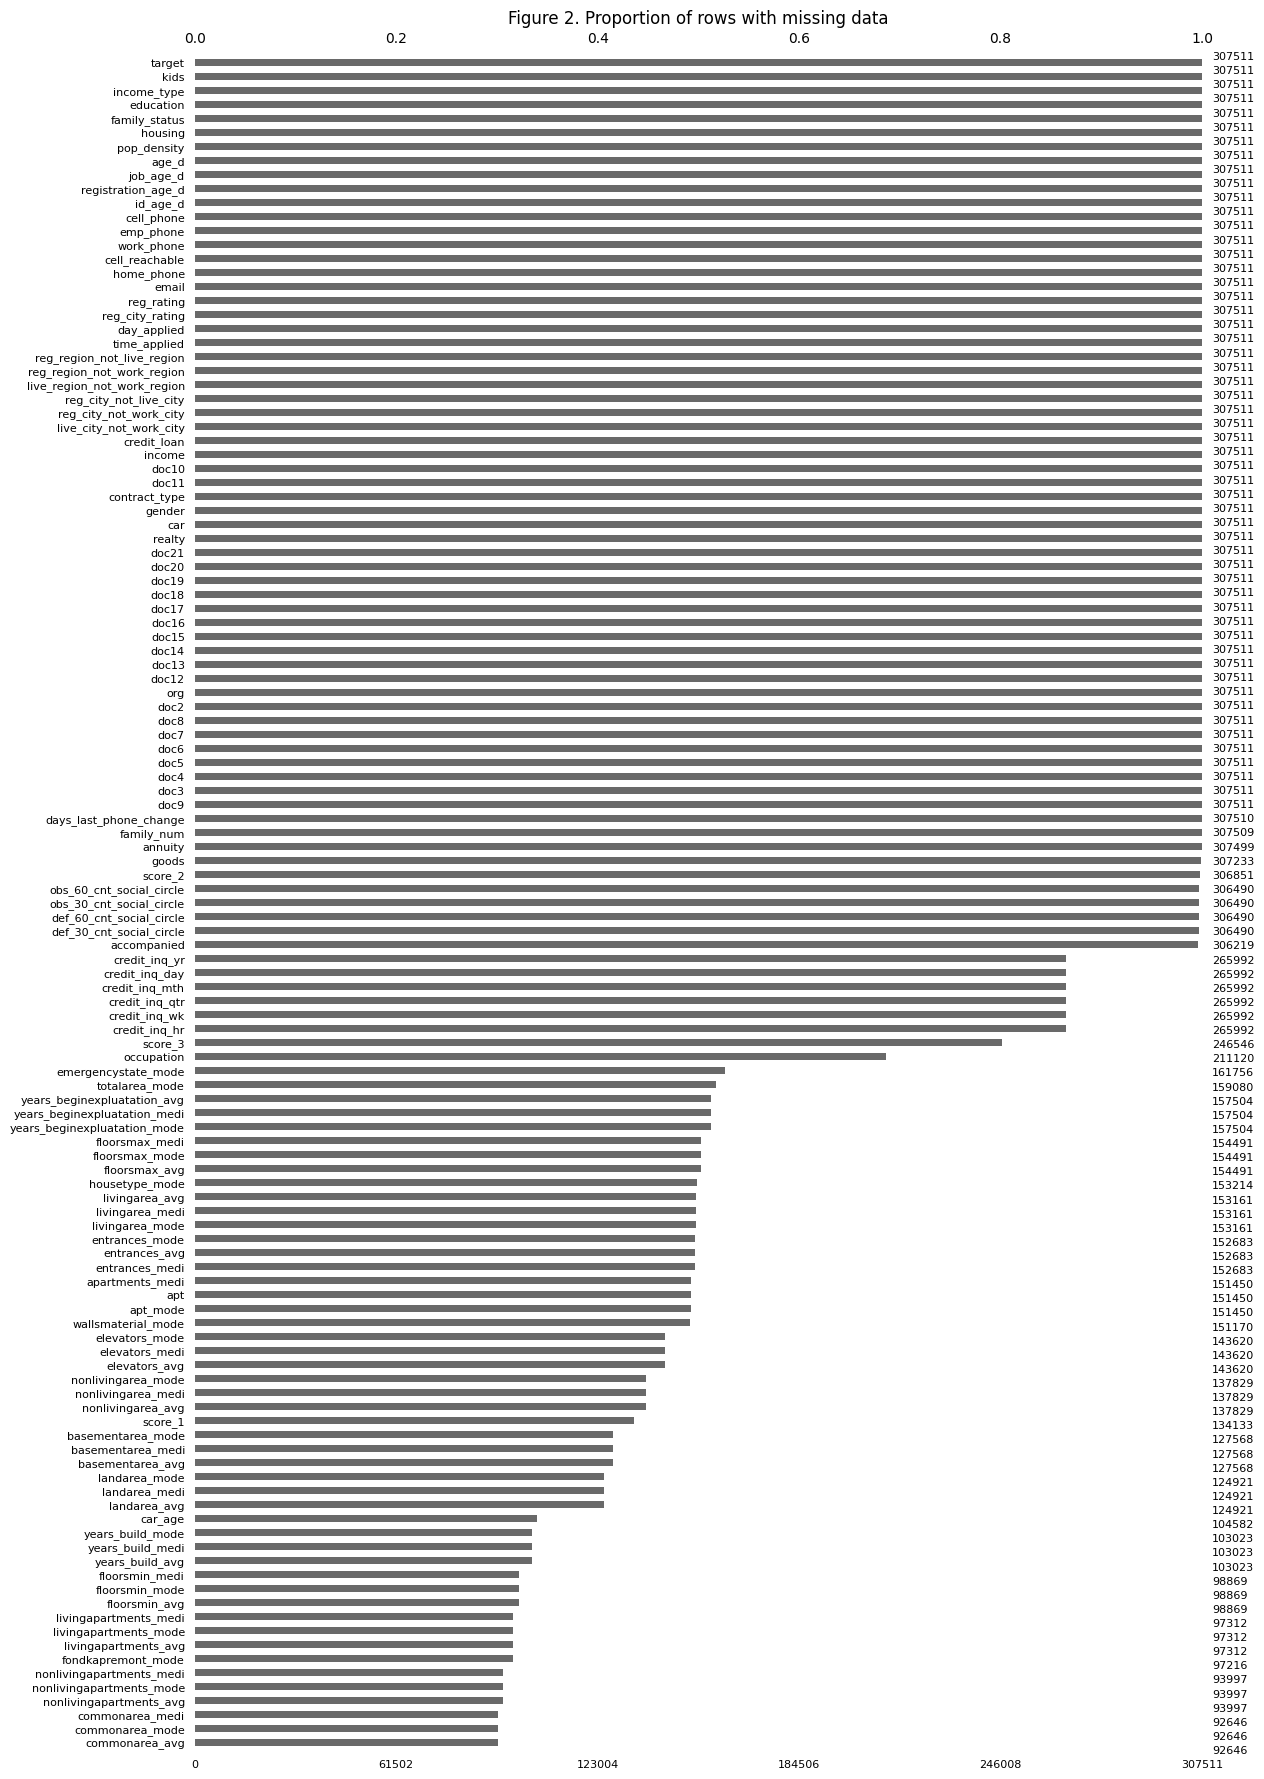

In [7]:
fig, ax = plt.subplots(figsize=(13, 22))

msno.bar(train1, sort="ascending", ax=ax)
plt.title("Figure 2. Proportion of rows with missing data", fontsize=12)
ax.tick_params(axis="y", labelsize=8)
ax.tick_params(axis="x", labelsize=8)
texts = fig.findobj(lambda x: isinstance(x, plt.Text))
for text in texts:
    if text.get_text().isdigit():
        text.set_fontsize(8)

plt.show()

In [8]:
train1.columns

Index(['target', 'contract_type', 'gender', 'car', 'realty', 'kids', 'income',
       'credit_loan', 'annuity', 'goods',
       ...
       'doc18', 'doc19', 'doc20', 'doc21', 'credit_inq_hr', 'credit_inq_day',
       'credit_inq_wk', 'credit_inq_mth', 'credit_inq_qtr', 'credit_inq_yr'],
      dtype='object', length=121)

* ##### How many observation of client's social surroundings defaulted on 30 DPD (days past due) 

In [9]:
train1.def_30_cnt_social_circle.value_counts()

def_30_cnt_social_circle
0.00     271324
1.00      28328
2.00       5323
3.00       1192
4.00        253
5.00         56
6.00         11
7.00          1
34.00         1
8.00          1
Name: count, dtype: int64

In [10]:
train1.obs_30_cnt_social_circle.value_counts()

obs_30_cnt_social_circle
0.00      163910
1.00       48783
2.00       29808
3.00       20322
4.00       14143
5.00        9553
6.00        6453
7.00        4390
8.00        2967
9.00        2003
10.00       1376
11.00        852
12.00        652
13.00        411
14.00        258
15.00        166
16.00        133
17.00         88
18.00         46
19.00         44
20.00         30
21.00         29
22.00         22
23.00         15
25.00         11
24.00         11
27.00          5
26.00          3
30.00          2
28.00          1
29.00          1
47.00          1
348.00         1
Name: count, dtype: int64

<span style="color:blue">

#### **_Insights:_**</span>

* No full row duplicates
* Among features with most missing values, a large proportion pertain to dimensions of the applicant residence, which seems like an excessive number of features to (presumably) estimate the socioeconomic status of borrower. 

<span style="color:blue">

#### **_1.1.3 Create eight new features_**</span>

* credit_utilization_ratio
* credit2income
* annuity_to_income_ratio
* days_since_last_id_change
* family_size
* phone_accessibility
* recent_credit_inquiries
* property_owner

<a id='new_features_application_train'></a>

In [11]:
train2 = create_feature_ratios(train1)
print(train2.columns)

Index(['target', 'contract_type', 'gender', 'car', 'realty', 'kids', 'income',
       'credit_loan', 'annuity', 'goods',
       ...
       'credit_inq_mth', 'credit_inq_qtr', 'credit_inq_yr',
       'credit_utilization_ratio', 'credit2income', 'annuity_to_income_ratio',
       'days_since_last_id_change', 'family_size', 'phone_accessibility',
       'recent_credit_inquiries'],
      dtype='object', length=128)


In [12]:
features_all = train2
features_all_lst = features_all.columns.to_list()

In [13]:
joblib.dump(features_all_lst, "data/features_all_lst.joblib")

['data/features_all_lst.joblib']

In [14]:
joblib.dump(train2, "data/train_features_N01.joblib")

['data/train_features_N01.joblib']

<span style="color:blue">

### **_1.2 Application data: EDA_** </span>

- The following step includes: splitting the data, downsizing data type, taking sample (0.25), and defining data structures for EDA. We take a sample for EDA for expediency; data that will be used for modelling will be defined using the whole dataset.

In [15]:
X = train2.drop(columns=["target"], axis=1)
y = train2[["target"]]

X_train, X_val, X_test, y_train, y_val, y_test = split_val_test(
    X, y, train_size=0.6, val_size=0.2, test_size=0.2
)

train = X_train.merge(y_train, left_index=True, right_index=True)
val = X_val.merge(y_val, left_index=True, right_index=True)
test = X_test.merge(y_test, left_index=True, right_index=True)

train.shape, val.shape, test.shape

((184506, 128), (61502, 128), (61503, 128))

In [16]:
joblib.dump(train, "data/train.joblib")
joblib.dump(val, "data/val.joblib")
joblib.dump(test, "data/test.joblib")

['data/test.joblib']

In [17]:
train.dtypes

contract_type                category
gender                       category
car                          category
realty                       category
kids                          float32
                               ...   
days_since_last_id_change     float32
family_size                   float32
phone_accessibility           float32
recent_credit_inquiries       float32
target                        float32
Length: 128, dtype: object

In [18]:
select_cols = train.columns
(
    X_train,
    y_train,
    X_train_num,
    X_train_num_lst,
    X_train_cat,
    X_train_cat_lst,
    train,
) = process_dataset_eda(train, "target", test_size=0.25, selected_features=select_cols)

In [19]:
X_train.shape

(46127, 127)

In [20]:
X_train_cat.head()

contract_type gender car realty    accompanied  \
SK_ID_CURR                                                     
129980           Cash loans      F   N      N  Unaccompanied   
211382      Revolving loans      F   N      Y  Unaccompanied   
248757           Cash loans      M   Y      Y  Unaccompanied   
315690           Cash loans      F   N      N  Unaccompanied   
375927           Cash loans      M   Y      Y  Unaccompanied   

                     income_type                      education  \
SK_ID_CURR                                                        
129980                   Working  Secondary / secondary special   
211382                 Pensioner  Secondary / secondary special   
248757      Commercial associate               Higher education   
315690      Commercial associate               Higher education   
375927                   Working  Secondary / secondary special   

                   family_status            housing   occupation day_applied  \
SK_ID_CURR                                                                     
129980                   Married       With parents  Sales staff    SATURDAY   
211382                   Married  House / apartment          NaN    SATURDAY   
248757                   Married  House / apartment     Managers   WEDNESDAY   
315690      Single / not married  House / apartment  Secretaries      MONDAY   
375927                   Married  House / apartment     Laborers    THURSDAY   

                      org fondkapremont_mode  housetype_mode  \
SK_ID_CURR                                                     
129980      Self-employed                NaN             NaN   
211382                XNA                NaN  block of flats   
248757        Advertising                NaN             NaN   
315690       Construction   reg oper account  block of flats   
375927            Housing   reg oper account  block of flats   

           wallsmaterial_mode emergencystate_mode  
SK_ID_CURR                                         
129980                    NaN                 NaN  
211382                  Panel                  No  
248757                    NaN                 NaN  
315690           Stone, brick                  No  
375927                  Panel                  No

<span style="color:blue">

#### **_1.2.1 Assess target and other key variables_**

In [21]:
y_train.target.value_counts(normalize=True)

target
0.00   0.92
1.00   0.08
Name: proportion, dtype: float64

In [22]:
df = train
ct = pd.crosstab(
    df["target"],
    df["contract_type"],
    normalize="index",
    margins=True,
)
ct

contract_type  Cash loans  Revolving loans
target                                    
0.0                  0.90             0.10
1.0                  0.93             0.07
All                  0.90             0.10

Text(0.5, 1.0, 'Figure 3. Proportion of cash loans vs revolving loans')

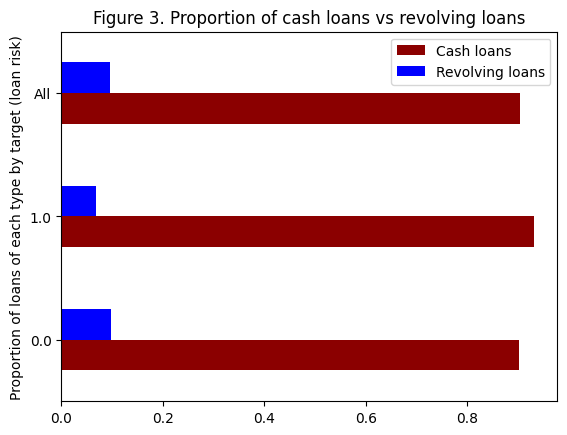

In [23]:
ax = ct.plot(kind="barh", color=["darkred", "blue"])
ax.set_ylabel("Proportion of loans of each type by target (loan risk)")
plt.legend(loc="upper right", bbox_to_anchor=(1, 1))
plt.title("Figure 3. Proportion of cash loans vs revolving loans")

<span style="color:blue">

#### **_Insights:_**</span>

* Dataset is imbalanced
* Nine out of 10 loans are cash loans (vs revolving)
* Revolving loans represent a greater proportion of loan applications that are at risk of default vs those that are not

<span style="color:blue">

#### **_1.2.2 Basic stats_** </span>

In [24]:
X_train_num.describe().T

count       mean        std        min  \
kids                      46,127.00       0.42       0.72       0.00   
income                    46,127.00 168,441.12 100,793.58  25,650.00   
credit_loan               46,127.00 598,489.44 403,126.62  45,000.00   
annuity                   46,126.00  27,044.31  14,376.71   2,596.50   
goods                     46,102.00 537,863.81 369,871.88  45,000.00   
...                             ...        ...        ...        ...   
annuity_to_income_ratio   46,126.00       0.18       0.09       0.01   
days_since_last_id_change 46,127.00  66,521.05 141,460.92 -15,128.00   
family_size               46,127.00       2.58       1.58       1.00   
phone_accessibility       46,127.00       2.28       0.45       1.00   
recent_credit_inquiries   46,127.00       0.01       0.14       0.00   

                                 25%        50%        75%          max  
kids                            0.00       0.00       1.00         7.00  
income                    112,500.00 144,000.00 202,500.00 4,500,000.00  
credit_loan               270,000.00 512,338.50 808,650.00 4,050,000.00  
annuity                    16,492.50  24,844.50  34,596.00   225,000.00  
goods                     238,500.00 450,000.00 679,500.00 4,050,000.00  
...                              ...        ...        ...          ...  
annuity_to_income_ratio         0.11       0.16       0.23         1.45  
days_since_last_id_change    -346.00   1,355.00   3,567.00   371,472.00  
family_size                     2.00       2.00       4.00        16.00  
phone_accessibility             2.00       2.00       3.00         3.00  
recent_credit_inquiries         0.00       0.00       0.00         6.00  

[111 rows x 8 columns]

<span style="color:blue">

#### **_Insights:_**</span>

* With 104 features, it would be very time consuming to conduct much EDA. To save time, we will use one of the automated EDA libraries. DataPrep uses Dask underneath so I heard it may be a good option for larger datasets.


In [25]:
# train0 = pd.read_csv("data/application_train.csv")
# train0.shape, train0.columns
# create_report(train0).show_browser()

# bureau = pd.read_csv("data/bureau.csv")
# bureau.shape, bureau.columns
# create_report(bureau).show_browser()

In [26]:
# csv_files = [
# "application_train.csv",
#     "bureau.csv",
#     "bureau_balance.csv",
#     "credit_card_balance.csv",
#     "installments_payments.csv",
#     "POS_CASH_balance.csv",
#     "previous_application.csv",
#     "sample_submission.csv",
# ]

# for filename in csv_files:
#     process_and_show_report(filename)

* There are several features assessing the number of credit inquiries in the period immediately before 

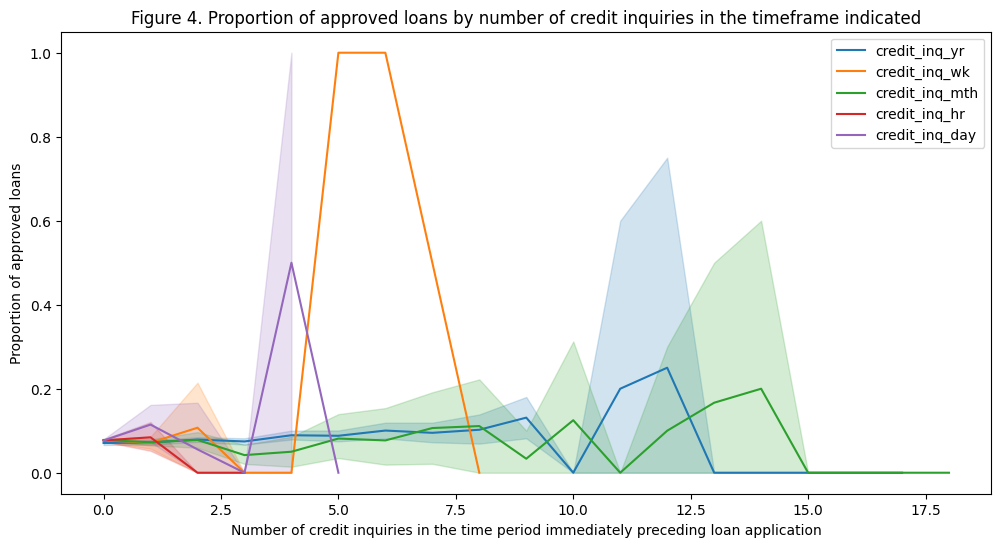

In [27]:
credit_inq_cols = [
    "credit_inq_yr",
    "credit_inq_wk",
    "credit_inq_mth",
    "credit_inq_hr",
    "credit_inq_day",
]

plot_lineplots(train, credit_inq_cols)

<span style="color:blue">

#### **_How to interpret the line chart_**</span>
* Each coloured line represents the proportion of loan applications that were approved corresponding to the number of credit inquiries conducted at the interval indicated by the line colour legend.
* The y-axis represents the proportion of approved loan applications
* The x-axis represents the number of credit inquiries in the period immediately preceding the application. Each coloured line _a different interval preceding the loan application_ for which the number of credit inquiries is conducted. For example, the red line represents the number of loan applications in the hour before the loan application is received.
* To identify a feature that might help to predict loan approval (ie. y-axis) we want to see if there is a feature that shows a more consistance variance pattern in the y-axis direction as data move in the x-axis direction.



<span style="color:blue">

#### **_1.2.4 Identify highly correlated pairs of numerical features and select the one with better performance_**</span>

* To reduce dimensionality, we will decrease the likelihood of multicollinearity by leaving out features that are highly correlated with other features. 

Text(0.5, 1.0, 'Figure 5. Spearman correlation heatmap')

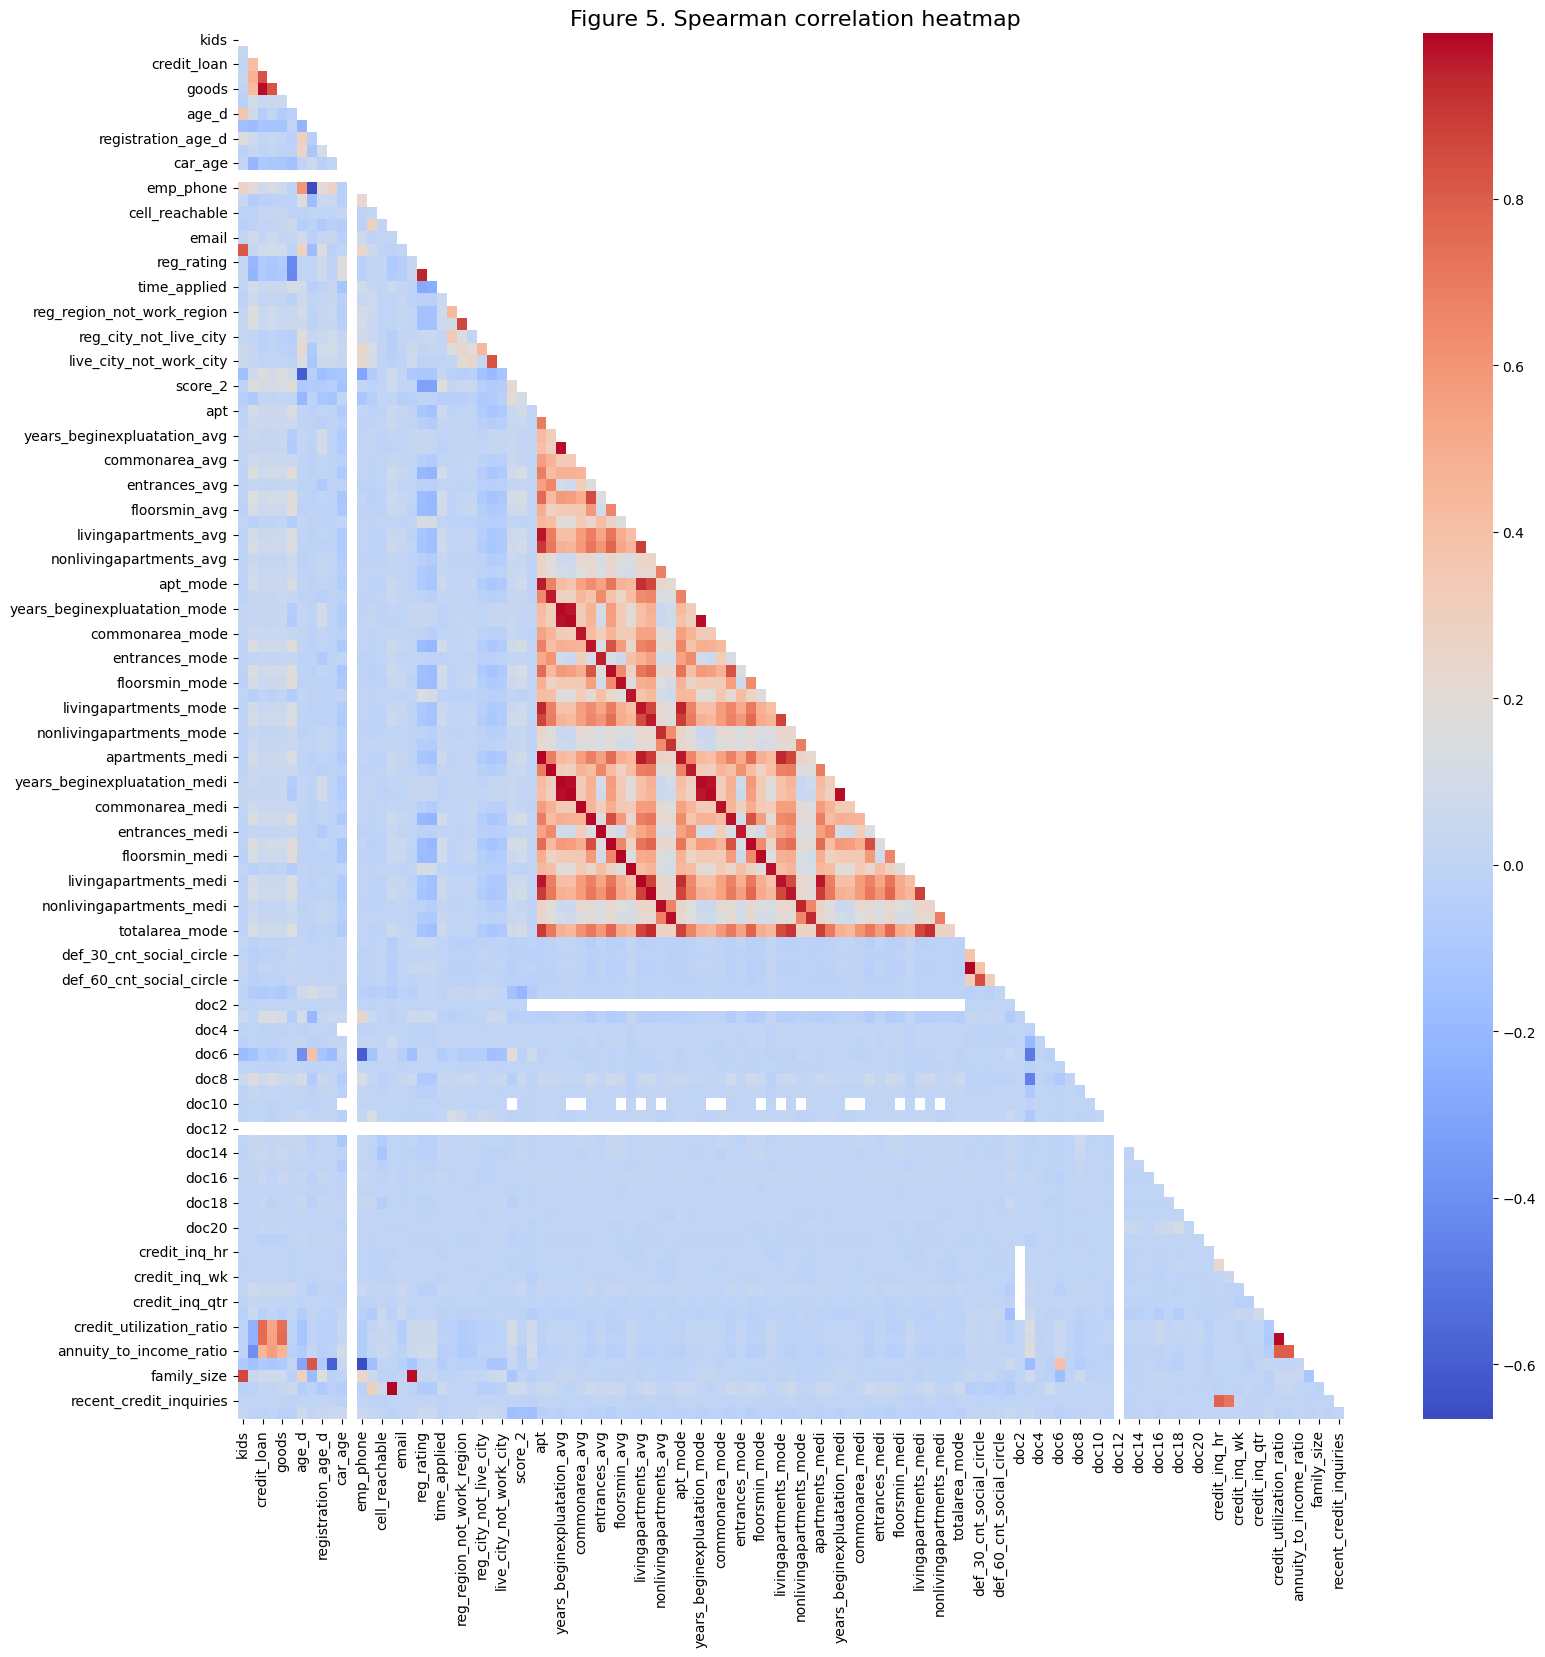

In [28]:
pd.reset_option("display.max_rows")
plt.figure(figsize=(18, 18))

train_num = X_train_num.merge(train["target"], left_index=True, right_index=True)
mask = np.triu(np.ones_like(train_num.corr(), dtype=bool))
cmap = sns.diverging_palette(0, 250, as_cmap=True)
sns.heatmap(
    train_num.corr(method="spearman"),
    mask=mask,
    annot=False,
    square=False,
    cmap="coolwarm",
    annot_kws={"size": 6},
)
plt.title("Figure 5. Spearman correlation heatmap", fontsize=16)

<span style="color:blue">

#### **_Insights:_**</span>

* All of the lines except for the blue line appear to show a general decrease in proportion of not-at-risk loan applications as the number of credit inquiries increases, as we would expect. A large number of loan inquiries before a loan application could suggest that the applicant is in financial distress or might need multiple credit lines.
* The green line (ie number of credit inquiries in the month immediately preceding the loan application date) appears to show more consistent pattern of variance with respect to loan approval. So we could predict that this feature might be the best candidate as a predictor of loan default.

<span style="color:blue">

#### **_Key findings EDA_**</span>
* No full observation duplicates
* Many variables with missing values measure dimensions of loan recipient's residence
* Data are imbalanced--indication for downsampling, selection of algorithm and metric
* Revolving loans represent a greater proportion of loan applications that are at risk of default vs other loans
* Among variables measuring credit inquiries, the variable number of inquiries in the the month immediately preceding the loan application date appears to show most variance with respect to target


In [29]:
correlation_matrix = X_train_num.corr(method="spearman")
high_correlation_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.90:
            colname = correlation_matrix.columns[i]
            high_correlation_pairs.append(
                (colname, correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
            )

print("Pairs of features with correlation > 0.90 or <-.90:")
for pair in high_correlation_pairs[:30]:
    print(f"{pair[0]} and {pair[1]} with correlation {pair[2]}")

Pairs of features with correlation > 0.90 or <-.90:
goods and credit_loan with correlation 0.9850613576995444
reg_city_rating and reg_rating with correlation 0.949139672544554
years_build_avg and years_beginexpluatation_avg with correlation 0.9851655154464415
livingapartments_avg and apt with correlation 0.9715200663264774
livingarea_avg and apt with correlation 0.9017294648906358
apt_mode and apt with correlation 0.9635291774922473
apt_mode and livingapartments_avg with correlation 0.9254072355380022
basementarea_mode and basementarea_avg with correlation 0.9601467358400417
years_beginexpluatation_mode and years_beginexpluatation_avg with correlation 0.9859662324439383
years_beginexpluatation_mode and years_build_avg with correlation 0.9695336259535989
years_build_mode and years_beginexpluatation_avg with correlation 0.9749323481156758
years_build_mode and years_build_avg with correlation 0.9896535117003795
years_build_mode and years_beginexpluatation_mode with correlation 0.979103498

In [30]:
tr = SmartCorrelatedSelection(
    variables=None,
    method="kendall",
    threshold=0.90,
    missing_values="ignore",
    selection_method="model_performance",
    estimator=RandomForestClassifier(random_state=42),
    scoring="roc_auc",
    cv=3,
)

X_reduced = tr.fit_transform(X_train_num, y_train)
X_reduced.shape

(46127, 77)

In [31]:
correlation_matrix = X_reduced.corr(method="spearman")
high_correlation_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.90:
            colname = correlation_matrix.columns[i]
            high_correlation_pairs.append(
                (colname, correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
            )

print("Pairs of features with correlation > 0.90 or <-.90:")
for pair in high_correlation_pairs:
    print(f"{pair[0]} and {pair[1]} with correlation {pair[2]}")

Pairs of features with correlation > 0.90 or <-.90:
livingapartments_mode and apt_mode with correlation 0.9514933162513292
nonlivingarea_mode and nonlivingarea_avg with correlation 0.9192864855024327
totalarea_mode and livingarea_medi with correlation 0.9302801759158809


<span style="color:blue">

#### **_1.2.5 Add categorical features and target to numeric features_**</span>

In [32]:
X_reduced.shape
features_smartcorr = X_reduced.merge(y_train, left_index=True, right_index=True)

In [33]:
features_smartcorr_lst = list(features_smartcorr.columns)
joblib.dump(features_smartcorr_lst, "data/features_smartcorr_lst.joblib")
len(features_smartcorr_lst)

78

<span style="color:blue">

#### **_1.2.6 Correlation bar (phik)_**

In [34]:
data_types = {
    "kids": "interval",
    "income": "interval",
    "credit_loan": "interval",
    "annuity": "interval",
    "pop_density": "float",
    "age_d": "interval",
    "job_age_d": "interval",
    "registration_age_d": "interval",
    "id_age_d": "interval",
    "car_age": "interval",
    "cell_phone": "categorical",
    "emp_phone": "categorical",
    "work_phone": "categorical",
    "cell_reachable": "categorical",
    "home_phone": "categorical",
    "email": "categorical",
    "family_num": "interval",
    "reg_rating": "categorical",
    "time_applied": "interval",
    "reg_region_not_live_region": "categorical",
    "reg_region_not_work_region": "categorical",
    "reg_city_not_live_city": "categorical",
    "reg_city_not_work_city": "categorical",
    "live_city_not_work_city": "categorical",
    "score_1": "float",
    "score_2": "float",
    "score_3": "float",
    "commonarea_avg": "float",
    "entrances_avg": "float",
    "floorsmax_avg": "float",
    "floorsmin_avg": "float",
    "landarea_avg": "float",
    "livingarea_avg": "float",
    "years_beginexpluatation_mode": "float",
    "elevators_mode": "float",
    "livingapartments_mode": "float",
    "nonlivingapartments_mode": "float",
    "basementarea_medi": "float",
    "nonlivingarea_medi": "float",
    "totalarea_mode": "float",
    "obs_30_cnt_social_circle": "interval",
    "def_30_cnt_social_circle": "interval",
    "def_60_cnt_social_circle": "interval",
    "days_last_phone_change": "interval",
    "doc2": "categorical",
    "doc3": "categorical",
    "doc4": "categorical",
    "doc5": "categorical",
    "doc6": "categorical",
    "doc7": "categorical",
    "doc8": "categorical",
    "doc9": "categorical",
    "doc10": "categorical",
    "doc11": "categorical",
    "doc12": "categorical",
    "doc13": "categorical",
    "doc14": "categorical",
    "doc15": "categorical",
    "doc16": "categorical",
    "doc17": "categorical",
    "doc18": "categorical",
    "doc19": "categorical",
    "doc20": "categorical",
    "doc21": "categorical",
    "credit_inq_hr": "interval",
    "credit_inq_day": "interval",
    "credit_inq_wk": "interval",
    "credit_inq_mth": "interval",
    "credit_inq_qtr": "interval",
    "credit_inq_yr": "interval",
    "contract_type": "categorical",
    "gender": "categorical",
    "car": "categorical",
    "realty": "categorical",
    "accompanied": "categorical",
    "income_type": "categorical",
    "education": "categorical",
    "family_status": "categorical",
    "housing": "categorical",
    "occupation": "categorical",
    "day_applied": "categorical",
    "org": "categorical",
    "fondkapremont_mode": "categorical",
    "housetype_mode": "categorical",
    "wallsmaterial_mode": "categorical",
    "emergencystate_mode": "categorical",
    "target": "categorical",
}

interval_cols = [
    col for col, v in data_types.items() if v == "interval" and col in X_reduced.columns
]
interval_cols

['kids',
 'income',
 'annuity',
 'age_d',
 'job_age_d',
 'registration_age_d',
 'id_age_d',
 'car_age',
 'time_applied',
 'def_30_cnt_social_circle',
 'def_60_cnt_social_circle',
 'days_last_phone_change',
 'credit_inq_hr',
 'credit_inq_day',
 'credit_inq_wk',
 'credit_inq_mth',
 'credit_inq_qtr',
 'credit_inq_yr']

In [35]:
reduced_full = X_reduced.merge(y_train, left_index=True, right_index=True)
reduced_sample = take_sample(reduced_full, "target", 0.25)

reduced_sample.shape

(11532, 78)

In [36]:
reduced_sample_dropna = reduced_sample.dropna()
reduced_sample_dropna.shape

phik_overview = reduced_sample_dropna.phik_matrix(interval_cols=interval_cols)

In [37]:
high_correlation_pairs = []
for i in range(len(phik_overview.columns)):
    for j in range(i):
        if abs(phik_overview.iloc[i, j]) > 0.90:
            colname = phik_overview.columns[i]
            high_correlation_pairs.append(
                (colname, phik_overview.columns[j], phik_overview.iloc[i, j])
            )

print("Pairs of features with correlation > 0.90 or <-.90:")
for pair in high_correlation_pairs[0:30]:
    print(f"{pair[0]} and {pair[1]} with correlation {pair[2]}")

Pairs of features with correlation > 0.90 or <-.90:
emp_phone and job_age_d with correlation 0.9985252561551098
reg_city_rating and pop_density with correlation 0.9976111119405604
live_region_not_work_region and reg_region_not_work_region with correlation 0.9808747041899554
live_city_not_work_city and reg_city_not_work_city with correlation 0.9773315348415055
score_1 and kids with correlation 1.0
score_1 and income with correlation 1.0
score_1 and annuity with correlation 1.0
score_1 and goods with correlation 1.0
score_1 and pop_density with correlation 1.0
score_1 and age_d with correlation 1.0
score_1 and job_age_d with correlation 1.0
score_1 and registration_age_d with correlation 1.0
score_1 and id_age_d with correlation 1.0
score_1 and car_age with correlation 1.0
score_1 and emp_phone with correlation 1.0
score_1 and work_phone with correlation 1.0
score_1 and cell_reachable with correlation 1.0
score_1 and email with correlation 1.0
score_1 and reg_city_rating with correlation

In [38]:
reduced_sample_dropna.shape

(451, 78)

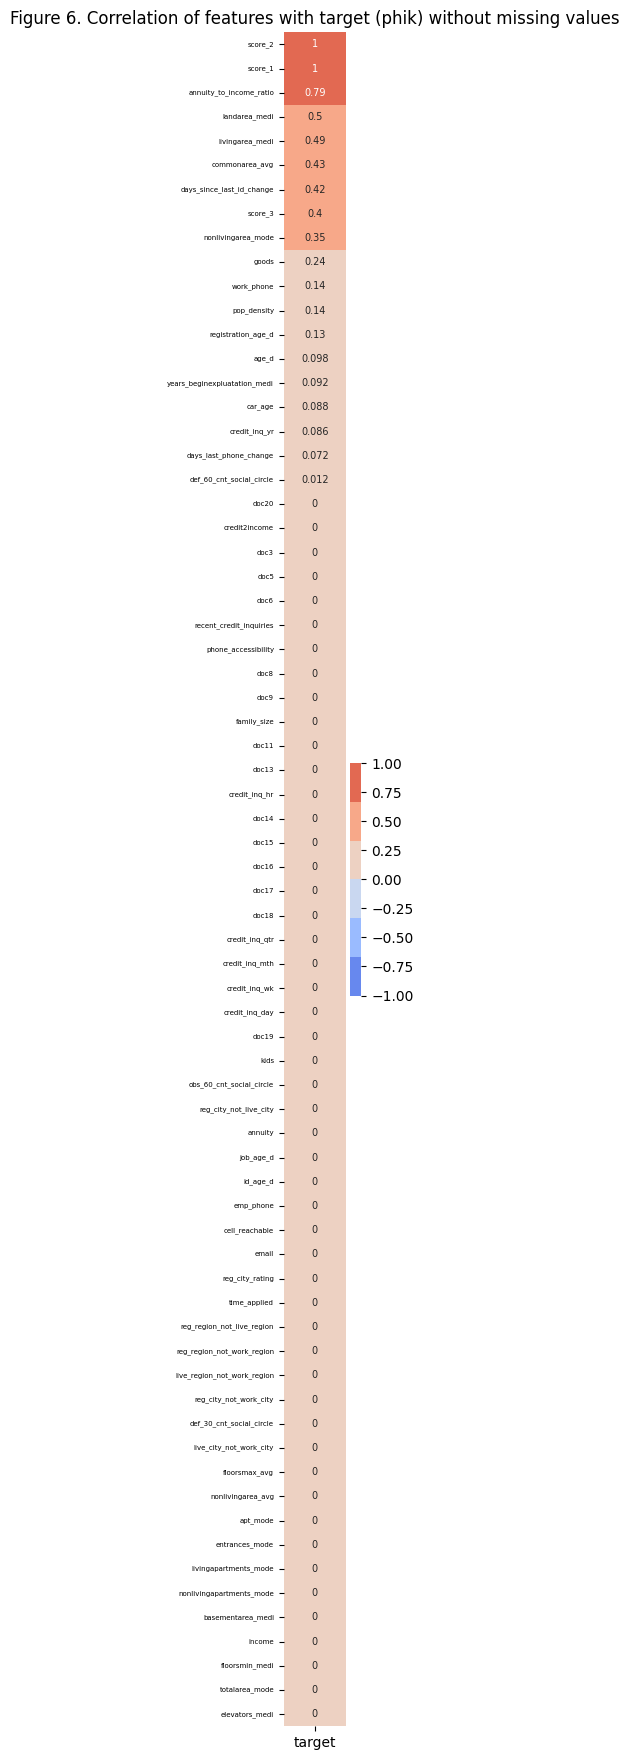

In [39]:
figure_colors_cmap = sns.color_palette("coolwarm", as_cmap=True)
corr_pastdue = correlation_bar(
    phik_overview,
    "target",
    "Figure 6. Correlation of features with target (phik) without missing values",
)

In [40]:
phik_target = phik_overview[["target"]]
features_hi_phik = phik_target[phik_target["target"] > 0.25]
features_hi_phik_lst = features_hi_phik.index.tolist()

In [41]:
joblib.dump(features_hi_phik_lst, "data/features_hi_phik_lst.joblib")

['data/features_hi_phik_lst.joblib']